#Importing Dataset

#Importing libraries

In [6]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
fruit-and-vegetable-image-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#Data Preprocessing

##Training Image preprocessing

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [12]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [20]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [21]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [22]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [24]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 71s 607ms/step - loss: 8.2953 - accuracy: 0.0369 - val_loss: 3.5597 - val_accuracy: 0.1026
Epoch 2/32
98/98 [==============================] - 61s 588ms/step - loss: 3.5284 - accuracy: 0.0507 - val_loss: 3.3945 - val_accuracy: 0.2108
Epoch 3/32
98/98 [==============================] - 62s 596ms/step - loss: 3.3345 - accuracy: 0.1111 - val_loss: 3.0492 - val_accuracy: 0.3077
Epoch 4/32
98/98 [==============================] - 62s 588ms/step - loss: 3.1099 - accuracy: 0.1628 - val_loss: 2.4295 - val_accuracy: 0.4786
Epoch 5/32
98/98 [==============================] - 62s 599ms/step - loss: 2.8187 - accuracy: 0.2331 - val_loss: 2.0301 - val_accuracy: 0.6040
Epoch 6/32
98/98 [==============================] - 63s 603ms/step - loss: 2.5522 - accuracy: 0.2960 - val_loss: 1.6025 - val_accuracy: 0.6553
Epoch 7/32
98/98 [==============================] - 64s 617ms/step - loss: 2.2479 - accuracy: 0.3750 - val_loss: 1.4429 - val_accuracy: 0.6866

##Evaluating Model

In [25]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 53s 506ms/step - loss: 0.0935 - accuracy: 0.9782
Training accuracy: 0.9781701564788818


In [26]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 7s 112ms/step - loss: 0.4235 - accuracy: 0.9459
Validation accuracy: 0.945868968963623


##Saving Model

In [27]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
training_history.history #Return Dictionary of history

{'loss': [8.295309066772461,
  3.528442859649658,
  3.3345158100128174,
  3.1099295616149902,
  2.818704843521118,
  2.552234411239624,
  2.247934579849243,
  1.9467874765396118,
  1.6928750276565552,
  1.4777158498764038,
  1.2609564065933228,
  1.1298608779907227,
  1.0459593534469604,
  0.9352108836174011,
  0.8218175768852234,
  0.7492485046386719,
  0.6812061071395874,
  0.6265645623207092,
  0.590257465839386,
  0.5346436500549316,
  0.5061426758766174,
  0.4392961263656616,
  0.4484657645225525,
  0.428893119096756,
  0.370099812746048,
  0.36538615822792053,
  0.38336601853370667,
  0.3431321680545807,
  0.32348737120628357,
  0.3632163405418396,
  0.3317130506038666,
  0.26462164521217346],
 'accuracy': [0.03691813722252846,
  0.050722312182188034,
  0.11107543855905533,
  0.16276083886623383,
  0.23306581377983093,
  0.29598715901374817,
  0.37495988607406616,
  0.4536115527153015,
  0.5277688503265381,
  0.5849117040634155,
  0.6407704949378967,
  0.6764044761657715,
  0.706

In [29]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [30]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [31]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 94.5868968963623 %


#Accuracy Visualization

##Training Visualization

In [32]:
#training_history.history['accuracy']

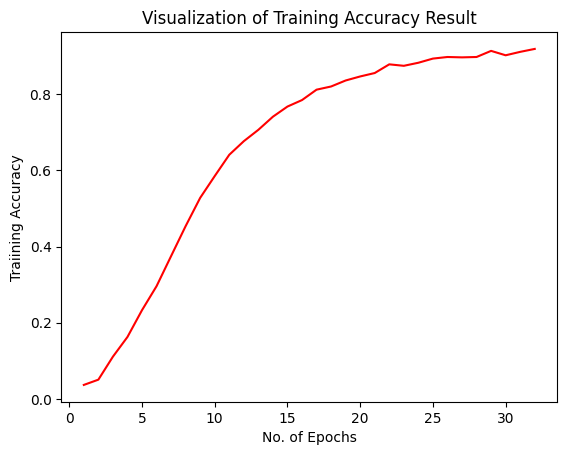

In [33]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

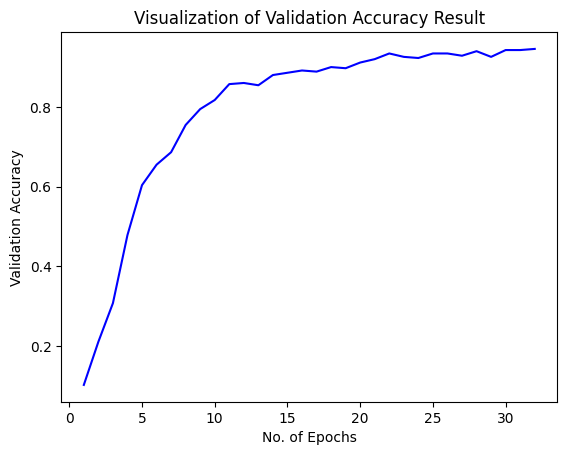

In [34]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [36]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 8s 156ms/step - loss: 0.4141 - accuracy: 0.9471
Test accuracy: 0.9470751881599426


In [37]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

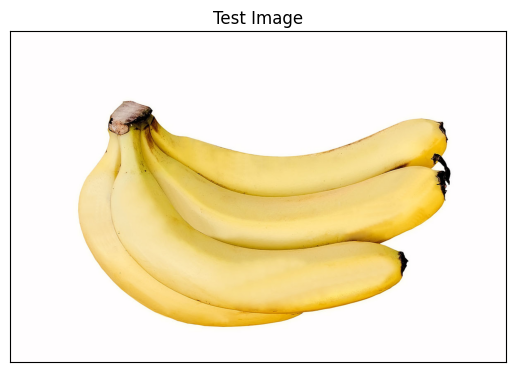

In [44]:
#Test Image Visualization
import cv2
image_path = '/content/test/banana/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

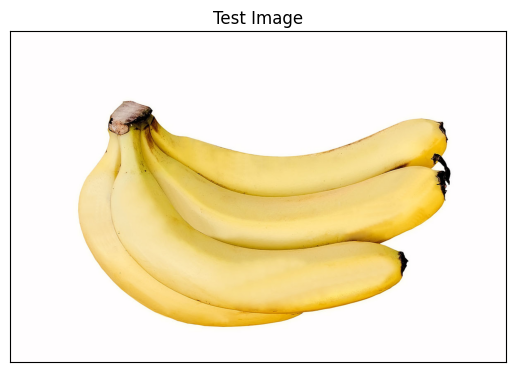

In [45]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
#Single image Prediction
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.image.resize(img_array, (64, 64)) # Resize image to match model input
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = cnn.predict(img_array)
result_index = np.argmax(predictions[0]) # Get index of the predicted class

print("It's a {}".format(test_set.class_names[result_index]))

1/1 [==============================] - 0s 18ms/step
It's a banana
